# IGC example

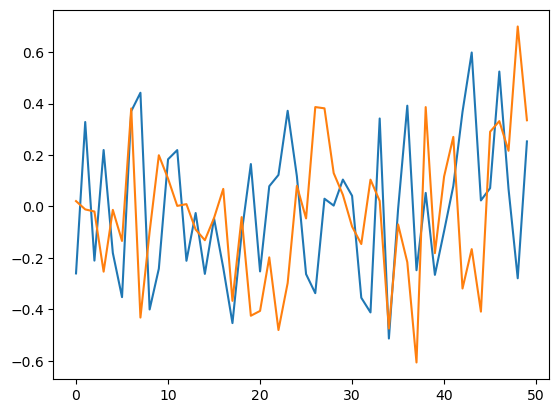

Epoch [1/50]  Train_loss: 0.13108  Test_loss: 0.10318  Elapsed: 0.329s
Epoch [2/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [3/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [4/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [5/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [6/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [7/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [8/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [9/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [10/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [11/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [12/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [13/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
Epoch [14/50]  Train_loss: 0.00000  Test_loss: 0.10318  Elapsed: 0.000s
E

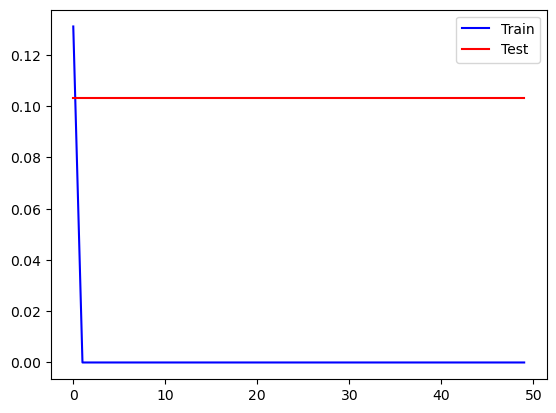

In [260]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import IGC

# Simulate [0 -> 3] connectivity signals
x, weights = IGC.simulate_data_random(5, [[0,3],], 0.2, order=5, nonlinear=False, fixed_weight=False, sn=10000)
# Add random signals for statistical inference
nrs=int(np.ceil(x.shape[-1]*.4))
x = torch.cat([x, torch.randn(x.shape[0], nrs)], axis=1)
# Normalization of input data
for i in range(x.shape[1]):
    x[:,i]=(x[:,i]-torch.mean(x[:,i]))/torch.std(x[:,i])/3.0
plt.plot(x[:50,[0,3]])
plt.show()
# Reconstruction of a dataset with (order) time steps (ex: 20)
x_train, y_train = IGC.multivariate_data(x, x, 0, int(x.shape[0]*0.8), 10, 1, 1, True)
x_test, y_test = IGC.multivariate_data(x, x, int(x.shape[0]*0.8), int(x.shape[0]), 10, 1, 1, True)
x_train = x_train.float()
y_train = y_train.float()
x_test = x_test.float()
y_test = y_test.float()

device="cuda:0"
# Build a predefined model and train
model = IGC.MVAR_biLSTM(x.shape[-1], 200, 1, x.shape[-1]).to(device)
trainhist, testhist = IGC.train_model(model, (x_train, y_train), (x_test, y_test), 
                                      50, lr=0.001, n_batch=100, device=device)
train_corr=IGC.evaluation_corr(model, (x_train, y_train))
test_corr=IGC.evaluation_corr(model, (x_test, y_test))
print('Train corr: %5.3f, Test corr: %5.3f' %(train_corr[1][3], test_corr[1][3]))
igc, cl, igc_t, igc_p, igc_f, igc_o, foi = IGC.ig_connectivity(x, model=model, nrs=nrs, device=device)
plt.plot(trainhist,'b', label='Train')
plt.plot(testhist,'r', label='Test')
plt.legend()
plt.show()

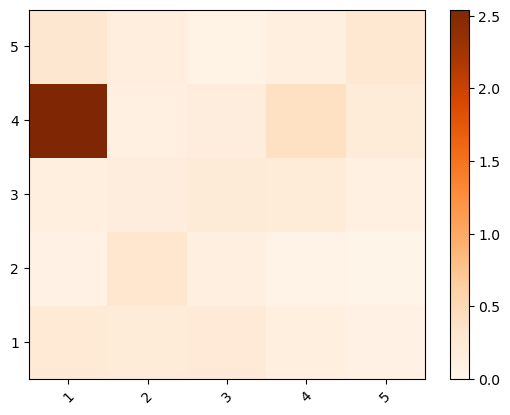

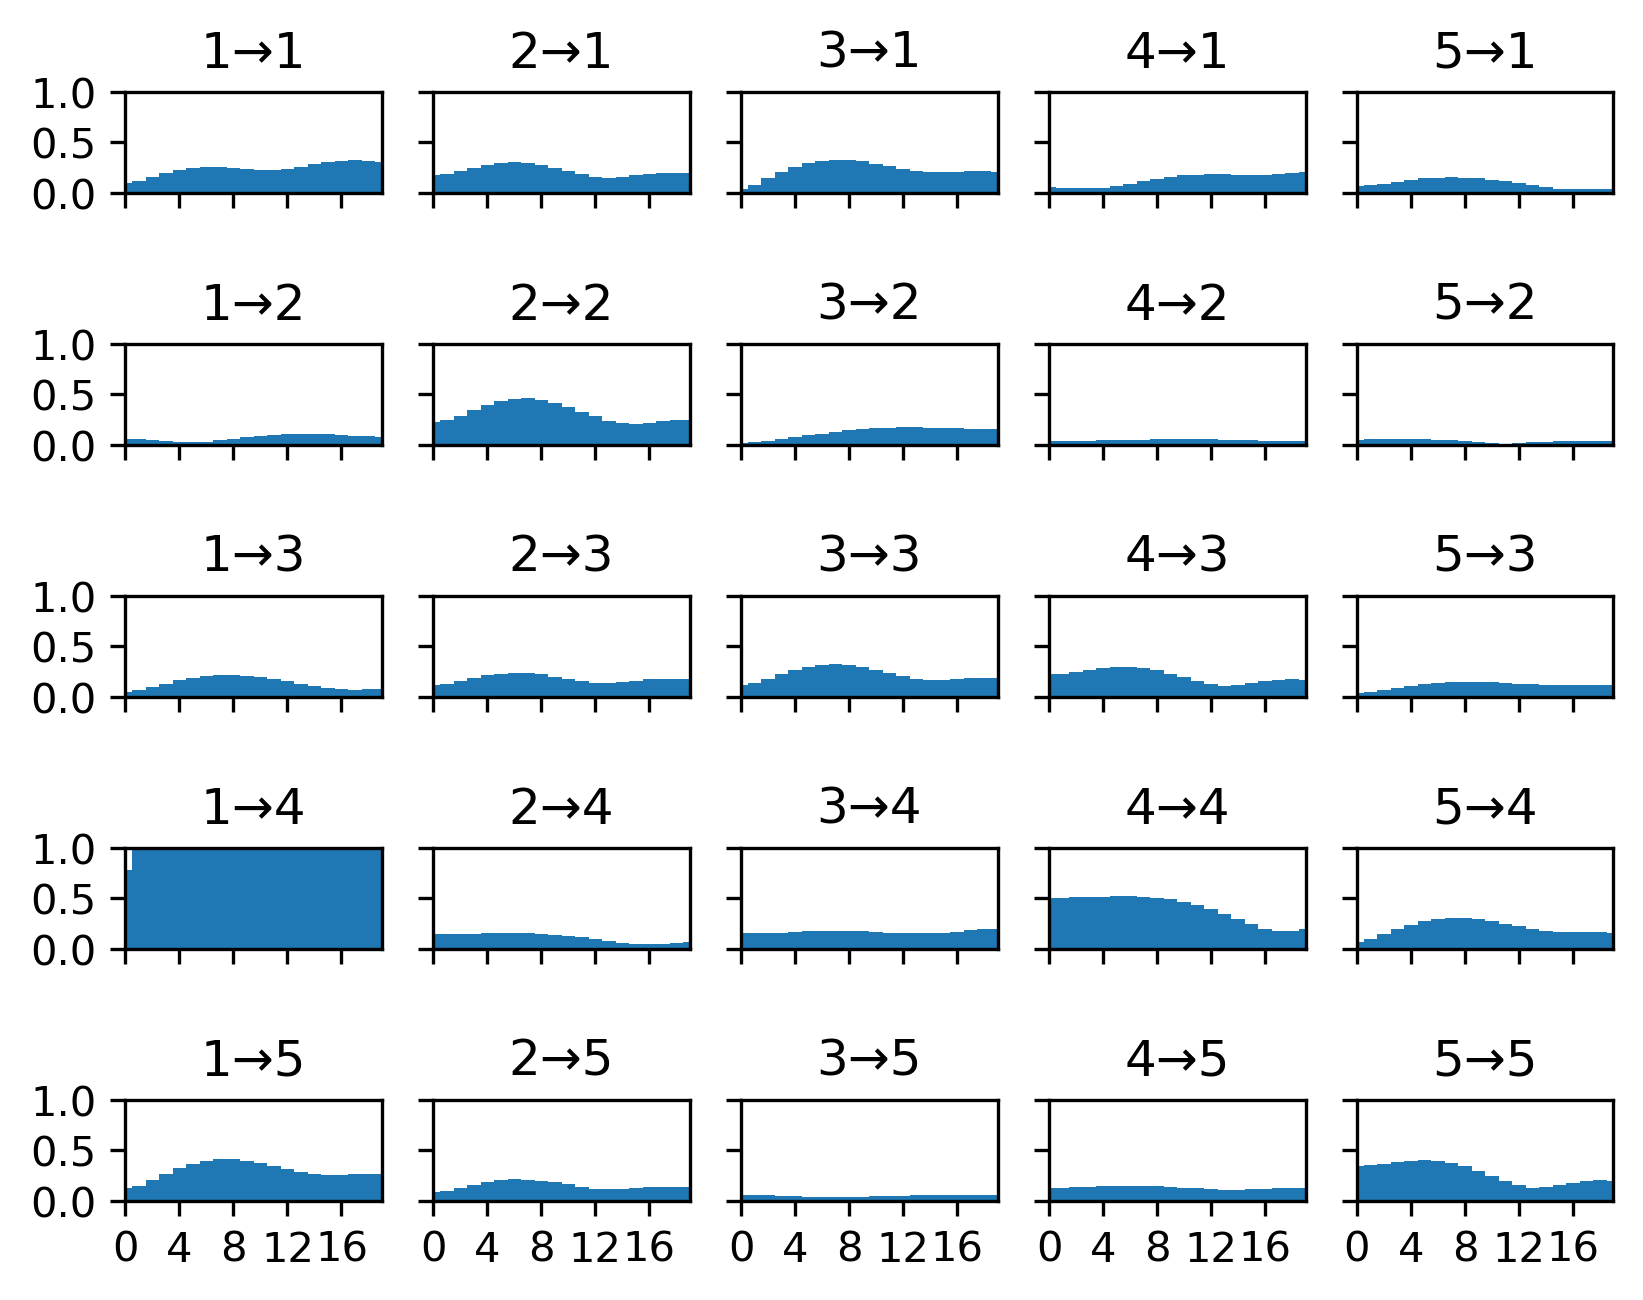

In [262]:
#igc, cl, igc_t, igc_p, igc_f, foi = ig_connectivity(x, model=model, nrs=2, device=device)
IGC.display_connectivity(igc,labels=['1','2','3','4','5'], vmax=igc.max())
fig=IGC.display_conn_spectrum(igc_f)